In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures

__The notebook is splitted as follows:__
- Understanding Overfitting phenomena considering polynomial regression fit over various degrees on the underlying data.
- Performing multiple linear regression without any cross validation using RFE for any random hyperparameter of number of features to select.
- Understanding the phenomena of cross validation by computing mean validation scores on each of the fold in every iteration.
- Performing K fold cross validation which is one of the kind of cross validation for hyperparameter tuning using GridSearchCV.
- Understanding different other methods of cross validation.

In [2]:
# reading the data 
housing_dataframe = pd.read_csv('Housing.csv')

In [3]:
# checking the head of the dataframe
housing_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


- First we will analyze the overfitting thoughgt process by building a polynomial regression.
- Considering a univariate regression meaning building a model considering only one predictor variable in making prediction about the target variable and analyzing the overfitting phenomena.
- Considering Area as the predictor variable and Price as the target variable.

### Overfitting Phenomena

In [4]:
sample_dataframe = housing_dataframe[['price', 'area']]
sample_dataframe.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


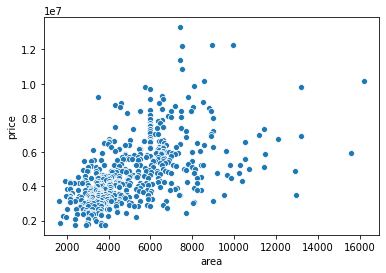

In [5]:
# analyzing the variation between predictor and target variable
sns.scatterplot(sample_dataframe['area'], sample_dataframe['price'])

- From above visualization we can see that there exists some kind of linear incerase relation between area and price.

In [6]:
# splitting the data into train and test
df_train, df_test = train_test_split(sample_dataframe, train_size = 0.70, test_size = 0.30, random_state = 100)

In [7]:
# checking df_train
df_train.head()

,price,area
359,3710000,3600
19,8855000,6420
159,5460000,3150
35,8080940,7000
28,8400000,7950


In [8]:
# checking the shapes of trian and test
df_train.shape, df_test.shape

((381, 2), (164, 2))

In [9]:
# scaling train and test data 
scaler = MinMaxScaler()
df_train[:] = scaler.fit_transform(df_train.loc[:, :])

# scaling test data
df_test[:] = scaler.transform(df_test.loc[:,:])

In [10]:
# checking df_train after scaling
df_train.head()

,price,area
359,0.169697,0.155227
19,0.615152,0.403379
159,0.321212,0.115628
35,0.548133,0.454417
28,0.575758,0.538015


In [11]:
# checking df_test after scaling
df_test.head()

,price,area
265,0.229697,0.091869
54,0.484848,0.366420
171,0.303030,0.742080
244,0.242424,0.306582
268,0.227879,0.274023


In [12]:
# splitting the data into X_train, y_train, X_test, y_test
X_train = df_train['area']
y_train = df_train['price']
X_test = df_test['area']
y_test = df_test['price']

In [13]:
# reshaping X_train and X_test as sklearn requires them to in 2D array format
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

- Building the model considering make_pipeline function using which we can create sequential models based on any of the model class.

In [14]:
# defining degress for performing polynimonial regression
degrees = [1,2,3,5,10,20]

# defining array for train and test in order to assign predicted values for each of the degrees being built.
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

# defining the dataframe for the train and test predictions over various degrees
train_pred_dataframe = pd.DataFrame()
test_pred_dataframe = pd.DataFrame()

# adding columns for X_train and X_test into the dataframe
train_pred_dataframe['X_train_actual'] = X_train.reshape(-1,)
test_pred_dataframe['X_test_actual'] = X_test.reshape(-1,)

# defining r2_score list for train and test
r2_train = []
r2_test = []

# defining the loop to iterate over the degrees list
for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # making predictions for the corresponding degree
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)
    
    # adding predictions into above defined dataframe
    train_pred_dataframe[str(degree) + ' degree_pred'] = y_train_pred[:, i]
    test_pred_dataframe[str(degree) + ' degree_pred'] = y_test_pred[:, i]
    
    # measuring model accuracy using r2_score for the predictions made on train and test by the model
    r2_train_score = r2_score(y_train, y_train_pred[:,i])
    r2_train.append(r2_train_score)
    r2_test_score  = r2_score(y_test, y_test_pred[:, i])
    r2_test.append(r2_test_score)

In [15]:
# checking train_pred_dataframe
train_pred_dataframe.head()

,X_train_actual,1 degree_pred,2 degree_pred,3 degree_pred,5 degree_pred,10 degree_pred,20 degree_pred
0,0.155227,0.198638,0.190170,0.188811,0.176421,0.176836,0.172289
1,0.403379,0.313332,0.342497,0.342364,0.358924,0.365424,0.366892
2,0.115628,0.180336,0.158205,0.159266,0.153432,0.147950,0.153651
3,0.454417,0.336922,0.363564,0.365543,0.381984,0.394362,0.395645
4,0.538015,0.375560,0.390506,0.395943,0.399730,0.389094,0.378667


In [16]:
# checking the test_pred_dataframe
test_pred_dataframe.head()

,X_test_actual,1 degree_pred,2 degree_pred,3 degree_pred,5 degree_pred,10 degree_pred,20 degree_pred
0,0.091869,0.169355,0.138014,0.141023,0.143369,0.138943,0.135895
1,0.366420,0.296250,0.325055,0.323571,0.337021,0.335038,0.341688
2,0.742080,0.469877,0.416824,0.424369,0.359292,0.423584,0.368185
3,0.306582,0.268594,0.292925,0.289839,0.294256,0.285794,0.271222
4,0.274023,0.253545,0.273420,0.269894,0.268456,0.262998,0.250056


In [17]:
# checking r2_train
r2_train

[0.2830500764266308,
 0.3279616409018168,
 0.3286728130882389,
 0.3427385881485695,
 0.35801548787702964,
 0.3677319839739088]

In [18]:
# checking r2_test
r2_test

[0.2951839057382547,
 0.2950554472063832,
 0.26349867530036575,
 0.07185225165046005,
 -95.70083557195146,
 -6162383148448.975]

In [19]:
# reshaping the array back into 1D array
X_train = X_train.reshape(-1,)
X_test = X_test.reshape(-1,)

In [20]:
train_pred_dataframe.shape

(381, 7)

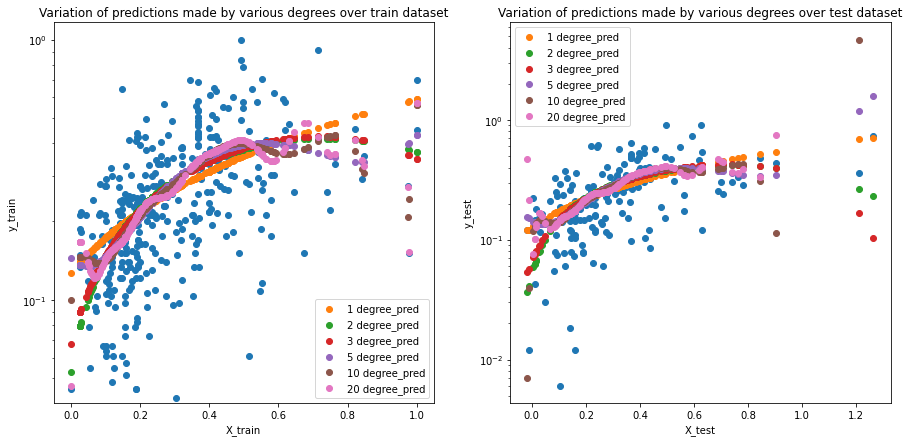

In [21]:
# analyzing the predictions made graphically
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
plt.scatter(X_train, y_train)
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.yscale('log')
plt.title('Variation of predictions made by various degrees over train dataset')
for index in range(1, train_pred_dataframe.shape[1]):
    plt.scatter(X_train, train_pred_dataframe.iloc[:,index], label = list(train_pred_dataframe.columns)[index])
    plt.legend(loc= 0)
plt.subplot(1,2,2)
plt.scatter(X_test, y_test)
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.yscale('log')
plt.title('Variation of predictions made by various degrees over test dataset')
for index in range(1, test_pred_dataframe.shape[1]):
    plt.scatter(X_test, test_pred_dataframe.iloc[:,index], label = list(test_pred_dataframe.columns)[index])
    plt.legend(loc= 0)
plt.show()

In [22]:
# printing the r2_score for train and test
combined_list = list(zip(r2_train, r2_test))
for index, name in enumerate(combined_list):
    print('The r2_score for trian and test of ' + str(degrees[index])+ ' degree are {} {}'.format(combined_list[index][0], combined_list[index][1]))

The r2_score for trian and test of 1 degree are 0.2830500764266308 0.2951839057382547
The r2_score for trian and test of 2 degree are 0.3279616409018168 0.2950554472063832
The r2_score for trian and test of 3 degree are 0.3286728130882389 0.26349867530036575
The r2_score for trian and test of 5 degree are 0.3427385881485695 0.07185225165046005
The r2_score for trian and test of 10 degree are 0.35801548787702964 -95.70083557195146
The r2_score for trian and test of 20 degree are 0.3677319839739088 -6162383148448.975


### Multiple Linear Regression Using RFE as feature selection method.

In [23]:
# checking the dataframe
housing_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
# checking the columns of the dataframe
housing_dataframe.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [25]:
# performing some encoding on the categorical features to convert them into dummy encoding
encoded_variables = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']
for column_name in encoded_variables:
    housing_dataframe[column_name] = housing_dataframe[column_name].map({'yes': 1, 'no' : 0})

In [26]:
# dummification of the column having more than one classes within the variable
furnishing_dummies = pd.get_dummies(housing_dataframe['furnishingstatus'], drop_first= True)
furnishing_dummies.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [27]:
# concatenation of the furnishing dummies into original dataframe
housing_dataframe = pd.concat([housing_dataframe, furnishing_dummies], axis = 1)

In [28]:
# dropping original furnishing column from the dataframe
housing_dataframe.drop('furnishingstatus', axis = 1, inplace = True)

In [29]:
# checking the housing dataframe after final columns modififcations
housing_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [30]:
# checking the shape of the dataframe 
housing_dataframe.shape

(545, 14)

In [31]:
# splitting the dataframe into train and test
df_train, df_test = train_test_split(housing_dataframe, train_size = 0.70, test_size = 0.30, random_state =  100)

In [32]:
# checking df_train 
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [33]:
# scaling the numerical columns apart from encoded columns in the dataframe
numerical_columns  = ['price', 'area', 'bedrooms', 'bathrooms', 'stories','parking']

# defining the scaler object
scaler = MinMaxScaler()

# fittting and transforming on the train data
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

In [34]:
# scaling df_test
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

In [35]:
# creating X and y variables from df_train
y_train = df_train.pop('price')
X_train = df_train

In [36]:
# checking X_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [37]:
# checking for y_train
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [38]:
# creating X_test and y_test from df_test
y_test = df_test.pop('price')
X_test = df_test

In [39]:
# checking X_test
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [40]:
# building the model using RFE
lm_model = LinearRegression()
# fitting the data on top of the model object
lm_model.fit(X_train, y_train)
# defining the RFE model object on top of the lm_model
rfe_model = RFE(lm_model, n_features_to_select= 10)
# defining the n_features_to_select arbritarly without any hyper parameter tuning
# fitting the rfe_model on to the data
rfe_model.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [41]:
# making predictions on the test dataset using rfe_model
y_train_pred = rfe_model.predict(X_train)
y_test_pred = rfe_model.predict(X_test)

In [42]:
# checking r2_score for the predictions made by the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(r2_train, r2_test)

0.6693323510272771 0.6519767225566987


- From the above scores we can see that the model which has been built by considering arbritary value of n_features_to_select has much no variation in train and test scores. Though the model has slight variation between train and test scores it cannot be considered as the final model as the hyperparameter has not been tuned. Upon tuning the hyperparameter having a peek on the test data is like violating the standard dictom of the machine learning model which is the model needs to be tested on the dataset which the model hasn't seen. Following as above will result in model performance for this particular test data but fails to generalize when exposed to unseen dataset. Hence it is better to tune the hyperparameters if abundant data is available. If not available in such we follow cross validation scheme whose demonstration will be shown later in the workbook.

- Considering the model is tuned with hyperparameter and to evaluate the model how the model will be able to perform on the test data it is better to compute cross validation score which will give an approximate estimate of model performance on the test data.

### Cross validation scheme

In [43]:
fold = KFold(n_splits= 5, shuffle= True, random_state= 100)
scores = cross_val_score(rfe_model, X_train, y_train, scoring = 'r2', cv = fold)

# checking the cross validation scores generated by the model upon performing cross validation
scores

array([0.57437609, 0.69319718, 0.60197212, 0.59433497, 0.57885218])

In [44]:
# checking the mean of the scores to get an estimate of the mean performance of the model on test data
np.mean(scores)

0.6085465106279038

### Performing Hyperparameter tuning using GridSearchCV

In [45]:
# defining the model object
lm_model_tune = LinearRegression()

# fitting the data on top of the linear regression model object
lm_model_tune.fit(X_train, y_train)

# defning RFE model object
rfe_model_tune = RFE(lm_model_tune)

# defining the param_grid to pass into gridsearch cv model object
params = [{'n_features_to_select': list(range(1, X_train.shape[1]))}]

# defining cross validation scheme object
folds = KFold(n_splits= 5, shuffle= True, random_state= 100)

# defining gridsearch cv model object
grid_model = GridSearchCV(rfe_model_tune, param_grid= params, scoring= 'r2', n_jobs = -1, verbose= True, cv = folds, return_train_score= True)

# fitting the data on top of the grid model object
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=True)

- It is necessary to result train_score as well as somtimes there might be case where train_score is high and test_score is low which is an clear indication of overfitting. Hence upon examining both it is better to check for the optimal combination of hyperparameters.

In [46]:
# checking the gridsearch results in dataframe
grid_result_dataframe = pd.DataFrame(grid_model.cv_results_)

# checking the dataframe
grid_result_dataframe.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027526,0.004258,0.003791,0.002778,1,{'n_features_to_select': 1},0.172606,0.351721,0.206887,0.165910,...,0.243658,0.077627,12,0.302971,0.265961,0.280611,0.300768,0.269025,0.283867,0.015506
1,0.027732,0.017614,0.001795,0.000746,2,{'n_features_to_select': 2},0.335665,0.428751,0.439969,0.505321,...,0.438360,0.058374,11,0.505799,0.489802,0.462091,0.474178,0.471907,0.480755,0.015355
2,0.028125,0.002986,0.002792,0.000399,3,{'n_features_to_select': 3},0.421848,0.539257,0.491515,0.604426,...,0.516805,0.059902,10,0.568074,0.544917,0.542889,0.534685,0.542412,0.546596,0.011289
3,0.021741,0.001715,0.002593,0.000489,4,{'n_features_to_select': 4},0.449487,0.567101,0.494461,0.600237,...,0.526272,0.053074,9,0.587523,0.564018,0.549490,0.541496,0.549291,0.558364,0.016296
4,0.024335,0.006634,0.004388,0.002326,5,{'n_features_to_select': 5},0.494779,0.610200,0.492807,0.590812,...,0.541889,0.049257,7,0.620038,0.597033,0.584663,0.549413,0.589397,0.588109,0.022847


In [47]:
# checking the best hyperparameter combination resulted from gridsearch cv
grid_model.best_estimator_

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=12, step=1, verbose=0)

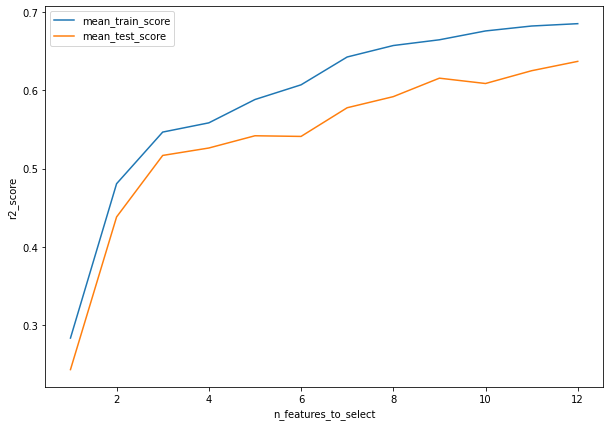

In [48]:
# deciding the hyperparameter analyzing mean_test and mean_train scores
plt.figure(figsize= (10,7))
plt.plot(list(range(1, X_train.shape[1])), grid_result_dataframe['mean_train_score'], label = 'mean_train_score')
plt.plot(list(range(1, X_train.shape[1])), grid_result_dataframe['mean_test_score'], label = 'mean_test_score')
plt.legend(loc = 0)
plt.xlabel('n_features_to_select')
plt.ylabel('r2_score')
plt.show()

- From the above variation we can see that both train and test scores are increasing and there is small gap in between them which doesn't create any overfitting issues. Hence it is better to go with 12 (n_featrues_to_select).

In [49]:
# Building the model as per hyperparameter value obtained from GridSearchCV results
lm_model_final = LinearRegression()

# defining RFE model object
rfe_model_final = RFE(lm_model_final, n_features_to_select= 12)

# fitting the rfe model obejct on top of the data
rfe_model_final.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=12, step=1, verbose=0)

In [50]:
# making predictions on test and train
y_test_pred = rfe_model_final.predict(X_test)
y_train_pred = rfe_model_final.predict(X_train)

# checking model performance
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('Train r2_score : {}'.format(r2_train))
print('Test r2_score : {}'.format(r2_test))

Train r2_score : 0.6814840385476647
Test r2_score : 0.6731013119788618


In [51]:
# checking cross validation scores to get an estimate of model on test dataset
scores_estimate = cross_val_score(rfe_model_final, X_train, y_train, cv = folds, scoring = 'r2')

# checking scores_estimate
scores_estimate

array([0.60295136, 0.71341684, 0.61359263, 0.6312411 , 0.62269298])

In [52]:
# checking the mean of the scores_estimate
np.mean(scores_estimate)

0.6367789817089998

- The average value will be the estimate of the model of how it will be performing on test dataset.

### Other types of cross validation schemes

- The sole purpose of cross validation scheme is to tune hyperparameters when the available data is limited. The cross validation scheme considers only the training dataset.<br><br>

- __K-Fold Cross Validation__: one of the popular cross validation scheme in which upon performing k iterations in each of the iteration kth fold is considered as held out set or validation set and the model is trained in (k-1) folds. Finally considering mean of the scoring metric considered for each of the hyperparameter combination. Upon considering large value of K the computation time increases and also the cross validation error reduces as in each iteration the model will be tuned on large training data.<br><br>

- __Leave one out Cross Validation (LOO)__: In this scheme 1 data point among n datapoints is held out in each of the iteration. thus enabling the model to be trained on maximum number of datapoints. Though reduces the cross validation error to complete extent but it is computationally intense to carry out. <br><br>

- __Leave P out Cross Validation (LPO)__: In this scheme P possible out of n data points combinations of train and test datasets are created and using each of the combination of train and test the hyperparameters are tuned. <br><br>

- __Stratified K-Fold Cross Validation__: This kind of cross validation scheme is executed in case of classiifcation problem statement as when the data is divided into train and validation while performing cross validation there might be chances of having different class proportions available in train and validation. Hence using this scheme it ensures that there exists balance in class labels proportion.